<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/overfitting-regularization/overfitting_regolarization_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting & Regularization - Exercise

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For this exercise, you will need to check for overfitting and regularize a second-order polynomial regression model. The model will use the Boston Housing Dataset, which you can download here, to estimate the value of homes.

The model will need to have:

* An R2 on the test set of at least 0.75.
* A cross-validated R2 of at least 0.8.

Additionally, the difference between the R2 on the training set and the test set must be less than 15% (for example, for a R2 on the training set of 1, the R2 on the test set must be no less than 0.85).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [ ]:
BASE_URL = 'https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing.csv'

df = pd.read_csv(BASE_URL, index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
x = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

In [ ]:
random_seed = 0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=random_seed)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


Create second degree polynomial features

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Create the model evaluation function

In [1]:
def evaluate_model(model, dataset):

  x, y = dataset

  y_pred = model.predict(x)

  print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}')
  print(f'MSE: {mean_squared_error(y, y_pred):.3f}')
  print(f'R2: {r2_score(y, y_pred):.3f}')

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

evaluate_model(lr, (x_train, y_train))
evaluate_model(lr, (x_test, y_test)) # first and third conditions not met

RMSE: 2.014
MSE: 4.056
R2: 0.952
RMSE: 5.440
MSE: 29.597
R2: 0.645


Try with a L2 regularization model

In [ ]:
model = Ridge(alpha=1.)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test)) # first condition satisfied but third not

RMSE: 2.417
MSE: 5.843
R2: 0.931
RMSE: 4.203
MSE: 17.668
R2: 0.788


In [ ]:
model = Ridge(alpha=10.)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 2.965
MSE: 8.789
R2: 0.896
RMSE: 4.142
MSE: 17.158
R2: 0.794


Try with a L1 regularization model

In [ ]:
model = Lasso(alpha=1.)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test)) # does not satisfy any conditions

RMSE: 4.648
MSE: 21.604
R2: 0.745
RMSE: 5.221
MSE: 27.263
R2: 0.673


Use cross validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

train_score = []
test_score = []

for train_index, test_index in kf.split(x):             # iterate over the various batches split above
  x_train, x_test = x[train_index], x[test_index]       # extract from the dataset the current batch to be used for the train and the one for the test
  y_train, y_test = y[train_index], y[test_index]

  poly = PolynomialFeatures(degree=2)                   # create polynomial features because the problem requires it
  x_train = poly.fit_transform(x_train)
  x_test = poly.transform(x_test)

  ss = StandardScaler()                                 # perform standardization
  x_train = ss.fit_transform(x_train)
  x_test = ss.transform(x_test)

  model = Ridge(alpha=10.)                              # we have previously seen that the best configuration has a regularization parameter of 10
  model.fit(x_train, y_train)

  r2_train = r2_score(y_train, model.predict(x_train))  # r2 calculation for train dataset
  r2_test = r2_score(y_test, model.predict(x_test))     # r2 calculation for test dataset

  train_score.append(r2_train)                          # add to the list
  test_score.append(r2_test)


scores = {'train': np.array(train_score), 'test': np.array(test_score)} # convert to numpy array to calculate mean with numpy mean

In [ ]:
scores['train'].mean()

np.float64(0.880684319262737)

In [ ]:
scores['test'].mean()

np.float64(0.8299227228169478)

In [ ]:
1-(scores['test'].mean()/scores['train'].mean())

np.float64(0.05763881033817453)

In this case the overfitting is really low because we have a 5.8% difference

Visualize the Learning Curve

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

In [ ]:
sns.set_theme() # import the theme of seaborn

In [ ]:
train_sizes_abs, train_scores, test_scores = learning_curve(  # create the learning curve
    Ridge(alpha=10.),                                         # pass the unfitted model (if I pass it fitted it would be refitted in this function)
    x,                                                        # pass the training sets
    y,
    random_state=random_seed)

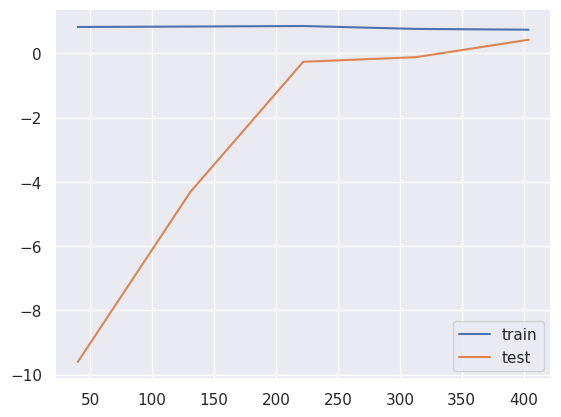

In [ ]:
plt.plot(train_sizes_abs,train_scores.mean(axis=1), label='train') # plot the learning curve
plt.plot(train_sizes_abs,test_scores.mean(axis=1), label='test')
plt.legend()
plt.show()

I start from a critical overfitting situation when I have little data, then adding training data it will improve and the R2 calculated on the test set will be more and more similar to the one calculated on the training set